In [1]:
import pandas as pd
import numpy as np

In [2]:
venancio = pd.read_parquet('../expresion/venancio.parquet')
venancio

Gene,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044501,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802
biosample,,,,,,,,,,,,,,,,,,,,,
SAMN00265078,5.453108,59.054636,1.408092,1.218809,0.000000,2.651369,2.801494,0.377480,0.523319,2.993846,...,0.0,0.000000,0.0,0.0,0.0,4.317951,0.421438,11.072744,0.000000,0.053070
SAMN00265079,6.500151,56.896441,6.155613,2.903028,14.714201,12.752819,4.904175,6.120868,7.059885,6.651526,...,0.0,0.000000,0.0,0.0,0.0,4.313916,0.000000,8.977273,0.518904,1.336911
SAMN00265080,3.103596,0.000000,4.038168,0.000000,2.434158,7.362351,1.693301,4.158352,9.958392,9.768484,...,0.0,0.000000,0.0,0.0,0.0,0.723192,0.000000,6.653363,0.000000,2.470588
SAMN00265081,4.226230,0.000000,4.021155,0.441538,2.820968,4.016449,1.627095,4.222031,7.327622,10.667464,...,0.0,0.000000,0.0,0.0,0.0,0.931953,0.297342,0.000000,0.390688,0.777894
SAMN00265082,2.582089,0.000000,1.710374,0.980639,5.646594,3.689870,1.837848,8.406095,5.689184,4.331051,...,0.0,0.000000,0.0,0.0,0.0,0.495017,0.000000,2.276112,0.000000,0.595369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN09295126,6.011819,0.000000,2.234152,0.000000,0.000000,2.596353,1.998173,0.000000,9.105045,4.742704,...,0.0,0.000000,0.0,0.0,0.0,8.817960,0.000000,32.194774,0.000000,0.000000
SAMN09295127,5.552961,21.092150,0.000000,0.000000,0.000000,0.000000,0.700031,1.792143,8.356985,3.354179,...,0.0,0.000000,0.0,0.0,0.0,5.273037,0.000000,0.000000,0.000000,0.604034
SAMN09295128,5.692426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.120328,4.756147,3.019845,...,0.0,0.000000,0.0,0.0,0.0,1.545678,0.000000,0.000000,0.000000,0.000000


In [3]:
condicion = pd.read_csv('../anotacion/condicion.csv', index_col=0)
condicion = condicion[condicion.isna().sum(axis=1) == 0]

In [4]:
sra = pd.read_csv('../metadata/sra.csv', index_col=0)
sra

/tmp/ipykernel_70742/2108350401.py:1: DtypeWarning: Columns (60,69,72,78,95,96,97,103,104,105,109,112,116,121,122,132,133,138,139,141,145,146,147,161,166,167,169,170,171,173,174,176,177,179,180,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,207,212,213,218,219,220,222,224,225,226,227,228,229,230,231,232,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  sra = pd.read_csv('../metadata/sra.csv', index_col=0)


,acc,assay_type,center_name,consent,experiment,sample_name,instrument,librarylayout,libraryselection,librarysource,...,quality_scoring_system_run,accession_ecotype_sam,tissue_and_developmental_stage_sam,experimental_factor__1_4_exp,concentration_sam,cultivation_pattren_sam,er_gfp_sam,subsrc_note_sam_s_dpl392,authors_sam,env_biome_sam
biosample,,,,,,,,,,,,,,,,,,,,,
SAMD00235537,DRR237204,RNA-Seq,RIKEN_CSRS,public,DRX227388,SAMD00235537,Illumina HiSeq 2500,PAIRED,PolyA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN30889879,SRR21660183,RNA-Seq,INNER MONGOLIA ACADEMY OF AGRICULTURAL & ANIMA...,public,SRX17659913,"CK (1,2,3,4)",Illumina NovaSeq 6000,PAIRED,cDNA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN09513405,SRR7447776,RNA-Seq,THE OHIO STATE UNIVERSITY,public,SRX4318240,SL209648,Illumina HiSeq 2500,PAIRED,PolyA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN09078292,SRR7124263,RNA-Seq,GEO,public,SRX4045331,GSM3132253,Illumina HiSeq 2000,SINGLE,cDNA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN36760700,SRR25459671,RNA-Seq,SOYBEAN,public,SRX21192507,R89-2-1,Illumina HiSeq 4000,PAIRED,PCR,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN25827181,SRR17968854,RNA-Seq,HUAZHONG AGRICULTURAL UNIVERSITY,public,SRX14125189,II-Early-12dpi-2C_rep2,Illumina HiSeq 4000,PAIRED,Oligo-dT,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN20971793,SRR15610895,RNA-Seq,GEO,public,SRX11908208,GSM5536784,AB SOLiD System 3.0,PAIRED,cDNA,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN41726398,SRR29315715,RNA-Seq,NORTHEAST AGRICULTURAL UNIVERSITY,public,SRX24832506,HPHO_MM_2,Illumina HiSeq 2000,PAIRED,RT-PCR,TRANSCRIPTOMIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
condicion, venancio = condicion.align(venancio, join='inner', axis=0)
sra, condicion = sra.align(condicion, join='right', axis=0)

In [6]:
condicion

,estres,tejido
biosample,,
SAMD00161793,control,root
SAMD00161795,control,stem
SAMD00161797,control,shoot
SAMD00161799,control,stem
SAMD00222772,cold,root
...,...,...
SAMN27611596,control,leave
SAMN27611597,control,leave
SAMN27616102,control,root


# Preprocesamiento

In [7]:
from sklearn import preprocessing, manifold
import matplotlib.pyplot as plt

In [8]:
def plot_los_tres(X, condicion, sra):
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    for bioproject in sra['bioproject'].unique():
        ax[0].scatter(X[sra['bioproject'] == bioproject, 0], X[sra['bioproject'] == bioproject, 1], alpha=0.5, label=condicion)
        ax[0].set_title('bioproject')
    for tejido in condicion['tejido'].unique():
        ax[1].scatter(X[condicion['tejido'] == tejido, 0], X[condicion['tejido'] == tejido, 1], alpha=0.5, label=tejido)
        ax[1].set_title('tejido')
        ax[1].legend()
    for estres in condicion['estres'].unique():
        ax[2].scatter(X[condicion['estres'] == estres, 0], X[condicion['estres'] == estres, 1], alpha=0.5, label=estres)
        ax[2].set_title('estres')
        ax[2].legend()
    return

In [9]:
tsne = manifold.TSNE()
venancio_tsne = tsne.fit_transform(venancio)

Text(0.5, 0.98, 't-SNE expresión con batch effect')

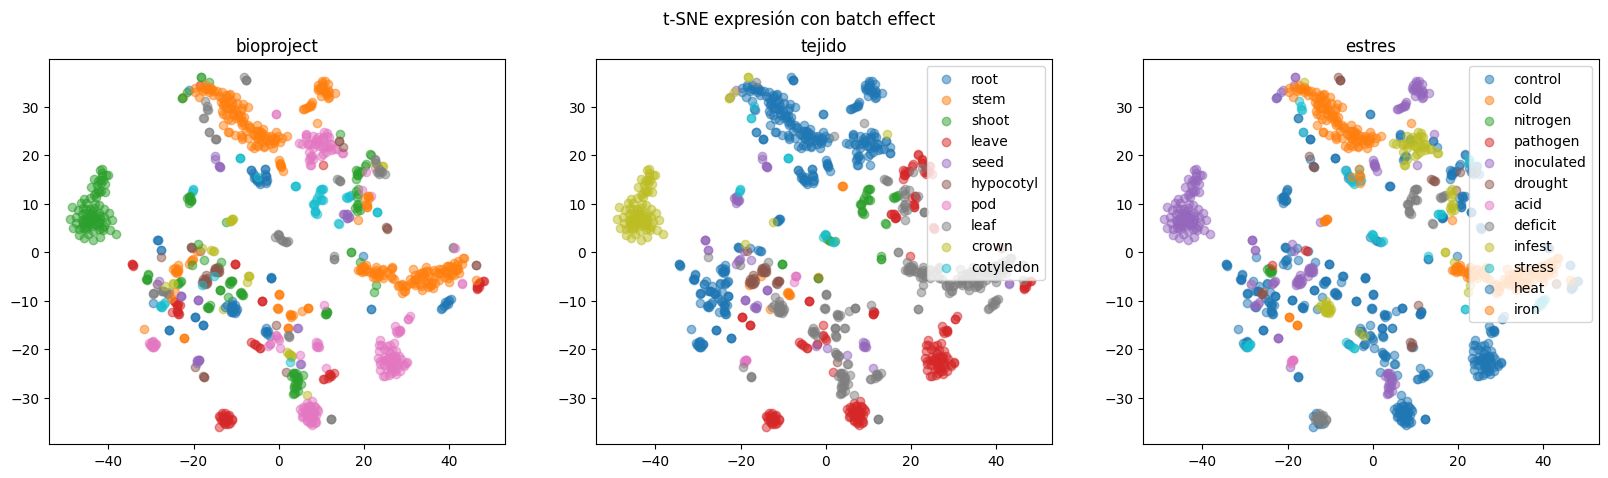

In [10]:
plot_los_tres(venancio_tsne, condicion, sra)
plt.suptitle('t-SNE expresión con batch effect')

In [11]:
venancio = venancio.groupby(sra['bioproject']).apply(lambda g: pd.DataFrame(preprocessing.scale(g), index=g.index, columns=g.columns)).droplevel('bioproject')
# venancio = venancio.groupby(condicion['tejido']).apply(lambda g: pd.DataFrame(preprocessing.scale(g), index=g.index, columns=g.columns)).droplevel('tejido')
venancio

Gene,Glyma.01G000100,Glyma.01G000137,Glyma.01G000174,Glyma.01G000211,Glyma.01G000248,Glyma.01G000285,Glyma.01G000322,Glyma.01G000359,Glyma.01G000400,Glyma.01G000600,...,Glyma.U044501,Glyma.U044700,Glyma.U044800,Glyma.U045000,Glyma.U045100,Glyma.U045402,Glyma.U045502,Glyma.U045602,Glyma.U045702,Glyma.U045802
biosample,,,,,,,,,,,,,,,,,,,,,
SAMD00161793,-0.377664,0.000000,1.732051,1.732051,-0.694405,-0.616680,1.602669,-0.577350,1.468828,0.688385,...,1.732051,1.732051,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD00161795,-0.882909,0.000000,-0.577350,-0.577350,0.078233,1.670322,0.085061,1.732051,-1.327739,-1.635642,...,-0.577350,-0.577350,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD00161797,-0.438198,0.000000,-0.577350,-0.577350,1.596854,-0.897394,-0.843865,-0.577350,0.116137,0.922044,...,-0.577350,-0.577350,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD00161799,1.698771,0.000000,-0.577350,-0.577350,-0.980682,-0.156248,-0.843865,-0.577350,-0.257226,0.025214,...,-0.577350,-0.577350,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD00222772,-0.445152,1.254306,-1.794812,-0.987744,0.455902,-1.383939,-0.930735,-0.417400,0.144489,-0.159376,...,2.828427,-0.751462,0.0,0.0,0.0,-0.387034,0.945925,0.178110,0.662733,-0.265257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN27611596,1.336445,0.000000,-0.472622,1.385204,-1.156581,-0.516209,1.379151,-1.310712,-0.583172,-1.394783,...,-0.417650,-0.707107,0.0,0.0,0.0,1.018259,0.000000,-0.103977,1.414214,1.413629
SAMN27611597,-0.267678,0.000000,1.390638,-0.939396,-0.126508,-0.882135,-0.960606,1.115275,-0.824180,0.899714,...,1.378943,-0.707107,0.0,0.0,0.0,0.340789,0.000000,1.273419,-0.707107,-0.742033
SAMN27616102,-0.173516,-0.707107,0.192480,1.076917,0.698538,-1.392082,0.494069,0.965520,1.408476,-0.824313,...,0.000000,1.206356,0.0,0.0,0.0,0.000000,0.309952,-0.707107,1.389863,1.381892


In [12]:
condicion, venancio = condicion.align(venancio, join='inner', axis=0)
sra, condicion = sra.align(condicion, join='right', axis=0)

Text(0.5, 0.98, 't-SNE expresión "sin" batch effect')

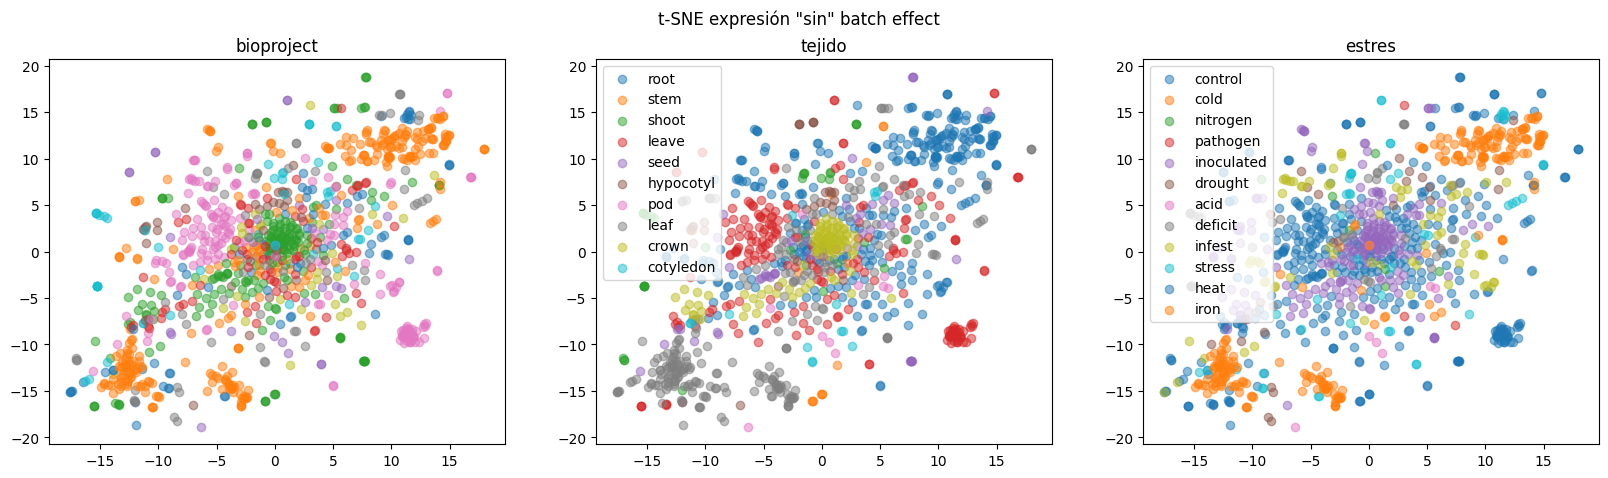

In [13]:
venancio_tsne = tsne.fit_transform(venancio)
plot_los_tres(venancio_tsne, condicion, sra)
plt.suptitle('t-SNE expresión "sin" batch effect')

# Modelado

In [14]:
from sklearn import model_selection, ensemble, linear_model

In [15]:
X = venancio
y = condicion['estres']

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y == 'control', random_state=5)

## Linear

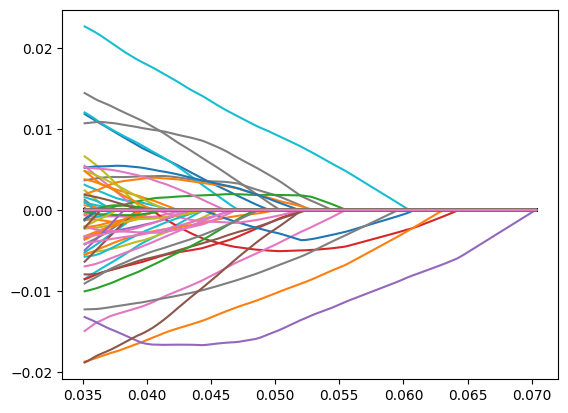

In [17]:
alfas, coefs, _ = linear_model.lasso_path(X_train, y_train, eps=0.5)
for coef in coefs:
    plt.plot(alfas, coef)

In [18]:
linear = linear_model.LassoCV(eps = 0.25, verbose = True, n_jobs=-1)
linear.fit(X_train, y_train)
linear.alpha_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


0.06259689756347397

Text(0.5, 1.0, 'Coeficientes ordenados por magnitud (lasso)')

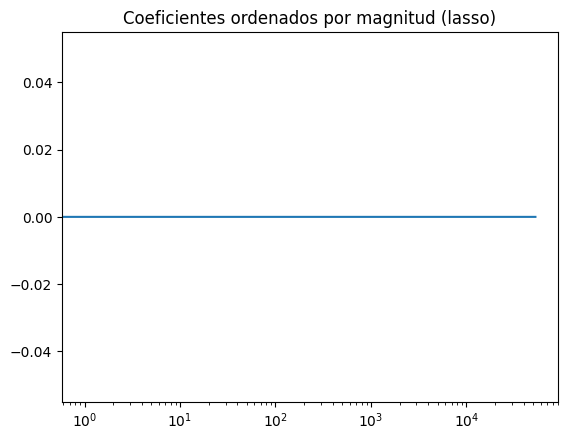

In [19]:
plt.semilogx(np.flip(np.sort(np.abs(linear.coef_))))
plt.title('Coeficientes ordenados por magnitud (lasso)')

In [20]:
(np.abs(linear.coef_) > 0.0015).sum()

0

In [21]:
X_tsne = tsne.fit_transform(X.loc[:, np.abs(linear.coef_) > 0.0015])
plot_los_tres(X_tsne, condicion, sra)
plt.suptitle('t-SNE expresión de genes seleccionados')

ValueError: at least one array or dtype is required

## Random Forest

In [34]:
random_forest = ensemble.RandomForestClassifier()
params = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(20, 50, 10),
    'min_samples_split': np.arange(2, 15, 4),
    'min_samples_leaf': np.arange(2, 15, 4),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

In [35]:
search = model_selection.RandomizedSearchCV(estimator=random_forest, param_distributions=params, n_jobs=-1, scoring='roc_auc')
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': array([20, 30, 40]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 2,  6, 10, 14]),
                                        'min_samples_split': array([ 2,  6, 10, 14]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   scoring='roc_auc')

In [36]:
search.cv_results_['mean_test_score'].mean()

0.9555130238892928

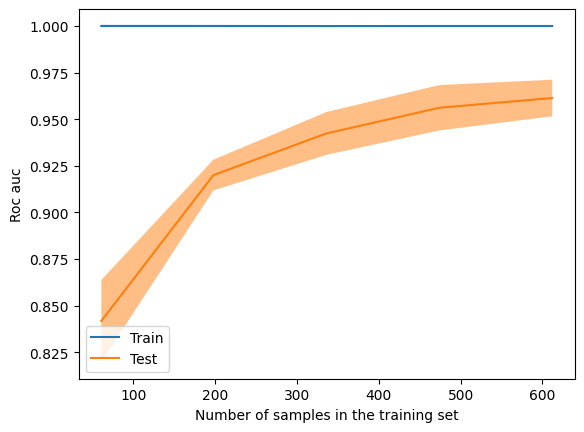

In [37]:
estimator = search.best_estimator_
model_selection.LearningCurveDisplay.from_estimator(estimator, X_train, y_train, scoring='roc_auc')

Text(0.5, 1.0, 'Importancias de features ordenadas (Random Forest)')

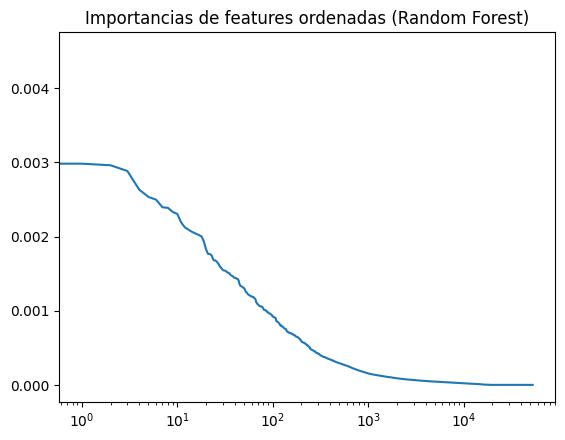

In [38]:
importances = np.flip(np.sort(estimator.feature_importances_))
plt.semilogx(importances)
plt.title('Importancias de features ordenadas (Random Forest)')

In [39]:
(estimator.feature_importances_ > 0.0025).sum()

6

Text(0.5, 0.98, 't-SNE expresión de genes seleccionados')

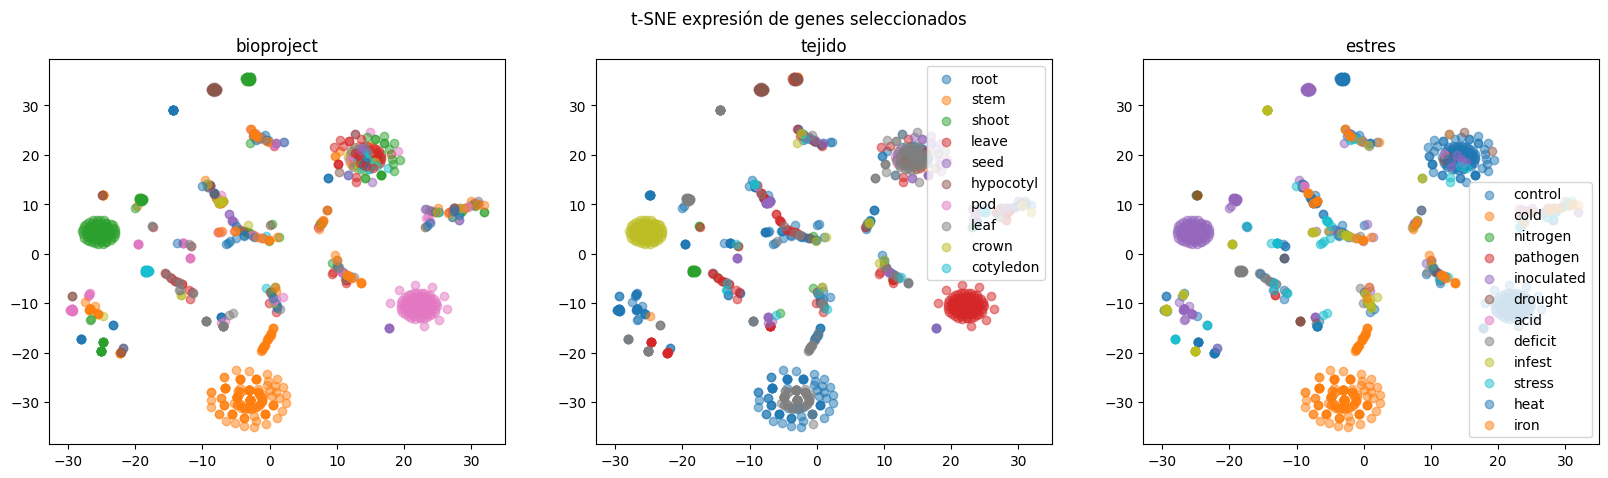

In [47]:
X_tsne = tsne.fit_transform(X.loc[:, estimator.feature_importances_ > 0.0025])
plot_los_tres(X_tsne, condicion, sra)
plt.suptitle('t-SNE expresión de genes seleccionados')

Text(0, 0.5, 'muestra')

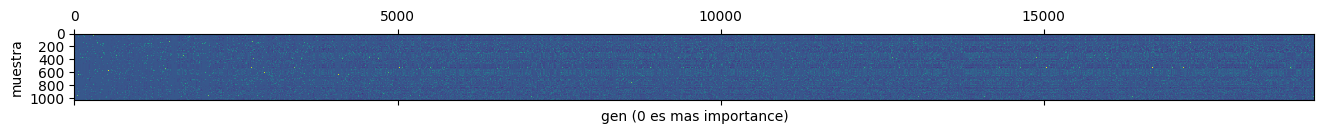

In [41]:
Xt = X.transpose()
Xt['importance'] = estimator.feature_importances_
Xt = Xt.sort_values('importance', ascending=False)
Xt = Xt[Xt['importance'] > 0]
Xt = Xt.transpose().join(condicion['estres'] == 'control').sort_values('estres').drop('estres', axis=1).drop('importance')
plt.matshow(Xt)
plt.xlabel('gen (0 es mas importance)')
plt.ylabel('muestra')

## Gradient Boosting

In [42]:
gbr = ensemble.GradientBoostingClassifier()
params = {
    "loss": ['log_loss', 'exponential'],
    "learning_rate": np.arange(0, 10, 1),
    "n_estimators": np.arange(1, 200, 1),
    "max_depth": np.arange(1, 50, 1),
    "max_features": ['sqrt', 'log2']
}

In [43]:
search = model_selection.RandomizedSearchCV(gbr, param_distributions=params, n_jobs=-1, scoring='roc_auc')
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': ['sqrt',...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
                   scoring='roc_auc')

In [44]:
search.cv_results_['mean_test_score'].mean()

0.7960663305677053

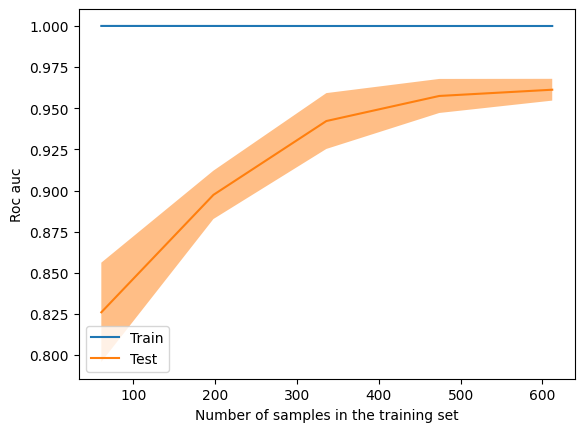

In [45]:
model_selection.LearningCurveDisplay.from_estimator(search.best_estimator_, X_train, y_train, scoring='roc_auc')